# Lecture10_Statistics_In_Data_Science_1

* 1. Random Sampling and Sample Bias
* 2. Sampling Distribution of Statistics
* 3. Bootstrap
* 4. 신뢰구간
* 5. 정규분포
* 6. 긴 꼬리 분포
* 7. 스튜던트의 t분포
* 8. 이항 분포
* 9. 포아송 분포와 그외 관련 분포들
	9.1 포아송 분포
	9.2 지수 분포
	9.3 베이불 분포


**what i didn't understand is..**
    *1.plt.subplot(n,n,n) & plt.subplot(n,n,n) & plt.subplot(n,n,n) sharex = ax1
    *2.Why is it important to look into long tail distribution in details
    
**the most impressive thing in this lecture**

현대 통계에서는 새로운 샘플을 뽑을 필요 없이, 부트 스트랩 재표본을 사용하여 표준 오차를 추정한다. 현대 통계에서 부트 스트랩은 표준 오차를 추정하는 표준 방법이 되었따. 사실 상 모든 통계에서 사용할 수 있으며, 중심극한 정리 또는 기타 분포 가정에 의존하지 않는다.
부트 스트랩은 모델링 하는 방법이 아니다

*reference
•	The elements of statistical learning-> 이책에서 라인 이나 카카오에서 문제를 냄
•	An Introduction to Statistical Learning (https://www-bcf.usc.edu/~gareth/ISL/)-> 위의 책의 쉬운 버전 임!


In [75]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## plot a line, implicitly creating a subplot(111)
# searborn is 'statistical data visualization' based on matplotlib
# in case of importing 'seaborn', can use various type of style not the defaulted one from matplotlib.


pd.options.display.max_columns=None

# pandas has an options system that lets you customize some aspects of its behaviour, display-related options being those the user is most likely to adjust.

In [8]:
pd.options.display.max_columns=999

미국 인구 데이터

In [9]:
state_pop_dataset = pd.read_csv('state-population.csv')
state_pop_dataset.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


미국 살인기록 데이터

In [10]:
dataset = pd.read_csv('murders.csv')
dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [11]:
# German credit data를 살펴보자.
german_dataset = pd.read_csv('german_credit_dataset.csv',  index_col=0)

In [12]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

In [13]:
dataset = pd.read_csv(path)
dataset

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...
5,A14 24 A32 A42 2835 A63 A75 3 A93 A101 4 A122 ...
6,A12 36 A32 A41 6948 A61 A73 2 A93 A101 2 A123 ...
7,A14 12 A32 A43 3059 A64 A74 2 A91 A101 4 A121 ...
8,A12 30 A34 A40 5234 A61 A71 4 A94 A101 2 A123 ...
9,A12 12 A32 A40 1295 A61 A72 3 A92 A101 1 A123 ...


In [14]:
dataset = pd.read_csv(path, delimiter=' ')
dataset

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
5,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
6,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
7,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
8,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2
9,A12,12,A32,A40,1295,A61,A72,3,A92,A101,1,A123,25,A143,A151,1,A173,1,A191,A201,2


In [15]:
dataset = pd.read_csv(path, delimiter=' ', header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


In [16]:
german_dataset_final = pd.concat([german_dataset, dataset])
german_dataset_final

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,10.0,4.0,0.0,2241.0,1.0,2.0,1.0,3.0,1.0,3.0,1.0,48.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,8.0,4.0,0.0,3398.0,1.0,4.0,1.0,3.0,1.0,4.0,1.0,39.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,6.0,4.0,0.0,1361.0,1.0,2.0,2.0,3.0,1.0,4.0,1.0,40.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,18.0,4.0,3.0,1098.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,65.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,24.0,2.0,3.0,3758.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,23.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
german_dataset_final = pd.concat([german_dataset, dataset], axis=0)
german_dataset_final

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,10.0,4.0,0.0,2241.0,1.0,2.0,1.0,3.0,1.0,3.0,1.0,48.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,8.0,4.0,0.0,3398.0,1.0,4.0,1.0,3.0,1.0,4.0,1.0,39.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,6.0,4.0,0.0,1361.0,1.0,2.0,2.0,3.0,1.0,4.0,1.0,40.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,18.0,4.0,3.0,1098.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,65.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,24.0,2.0,3.0,3758.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,23.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
german_dataset_final = pd.concat([german_dataset, dataset], axis=1)
german_dataset_final

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [19]:
german_dataset_final = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=0)
german_dataset_final

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,0
1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN
1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN
1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN
1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
1,1.0,10.0,4.0,0.0,2241.0,1.0,2.0,1.0,3.0,1.0,3.0,1.0,48.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN
1,1.0,8.0,4.0,0.0,3398.0,1.0,4.0,1.0,3.0,1.0,4.0,1.0,39.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
1,1.0,6.0,4.0,0.0,1361.0,1.0,2.0,2.0,3.0,1.0,4.0,1.0,40.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN
1,4.0,18.0,4.0,3.0,1098.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,65.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
1,2.0,24.0,2.0,3.0,3758.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,23.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [20]:
german_dataset_final.columns.values[-1] = 'Risk'
german_dataset_final

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,Risk
1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN
1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN
1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN
1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
1,1.0,10.0,4.0,0.0,2241.0,1.0,2.0,1.0,3.0,1.0,3.0,1.0,48.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN
1,1.0,8.0,4.0,0.0,3398.0,1.0,4.0,1.0,3.0,1.0,4.0,1.0,39.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
1,1.0,6.0,4.0,0.0,1361.0,1.0,2.0,2.0,3.0,1.0,4.0,1.0,40.0,3.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN
1,4.0,18.0,4.0,3.0,1098.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,65.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN
1,2.0,24.0,2.0,3.0,3758.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,23.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [21]:
"""
# 데이터에는 돈을 갚을 능력(Good/Bad)에 대한 데이터가 없다. 
# 따라서 해당 data를 concat 하도록 하겠다.

# Label 만 가지고 온다.
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

# 데이터를 concat
german_dataset_final = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)

# 컬럼 이름 변경
german_dataset_final.columns.values[-1] = 'Risk'
"""

"\n# 데이터에는 돈을 갚을 능력(Good/Bad)에 대한 데이터가 없다. \n# 따라서 해당 data를 concat 하도록 하겠다.\n\n# Label 만 가지고 온다.\npath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'\ndataset = pd.read_csv(path, delimiter=' ', header=None)\n\n# 데이터를 concat\ngerman_dataset_final = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)\n\n# 컬럼 이름 변경\ngerman_dataset_final.columns.values[-1] = 'Risk'\n"

In [22]:
german_dataset_final.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker,Risk
1,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,4.0,2.0,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,2.0,1.0,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN
1,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,4.0,1.0,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN
1,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,2.0,1.0,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN
1,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,4.0,2.0,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN


In [39]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


* 빅데이터 시대가 되면서 더 이상 표본 추출(표집, 샘플링)이 필요 없을 없을 거라는 오해 데이터의 질과 적합성을 일정 수준 이상으로 담보할 수 없으면서 데이터 크기만 늘어나는 것이 오늘날 상황 
* 오히려, 다양한 데이터를 효과적으로 다루고 데이터 편향을 최소화하기 위한 방법으로 표본 추출의 필요성이 더 커진다. 
* 전통적인 통계학에서는 강력한 가정에 기초한 이론을 통해 모집단을 밝혀내는 데 초점. 
* 현대 통계학에서는 이러한 가정이 더 이상 필요하지 않은, 즉 **효과적인 표본 추출**에 대한 연구로 방향이 옮겨지기 시작. 
* 데이터 과학자들은 이론적 측면에 대해 걱정하기 보다, 표본 추출 과정과 주어진 데이터에 집중할 필요가 있다.

# 1. Random Sampling and Sample Bias

* sample(표본) 
* population(모집단) 
* N 
* n 
* Random Sampling 
* Stratified sampling(층화표본추출): 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것 -> important 
* 단순랜덤표본: 모집단 층화(stratified) 없이 랜덤표본추출로 얻은 표본 
* 표본편향:모집단을 잘못 대표하는(misrepresents) 표모집단을 잘 못 설정하면 표본 편향 발생 (대표적인 예가 리뷰)

**Sampling Distribution of Statistics 용어정리**
* Sample statistic(표본통계량) : 더 큰 모집단에서 추출된 표본(a sample) 데이터들로부터 얻은 측정 지표 (예를 들어, 표본평균)
* Data distribution(데이터 분포) : 어떤 데이터 집합에서의 각 개별 값의 도수분포(1이 몇번 등장했고 2가 몇번 등장했고)
* Sampling distribution(표본분포) : 여러 표본들(samples) 혹은 재표본(resamples)들로부터 얻은 표본통계량의 도수분포모집단이 있을 때, 그 모집단에서 샘플 두개를 뽑았을 때, 그 두 샘플을 해당 모집단의 모 평균과 비슷할 것 그러나 이것들을 추출하다 보면 엑스 바에 대한 분포가 나올 것. 
* Central limit theorem(중심극한정리) : 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향표본 샘플이 많아 지면 많아 질수록 표본 평균의 분포가 정규분포를 따른다._ 수리 통계학에서 굉장히 중요한 개념이나 데이터 과학에서는 그렇게 중요하지는 않다. 
* Standard error(표준오차) : 여러 표본들(samples)로부터 얻은 표본통계량의 변량(개별 데이터 값들의 변량을 뜻하는 표준편차와 다름) 일반적으로 우리는 측정 및 통계 or 머신러닝 모델링을 위해 표본을 추출한다. 표본을 통한 추정이나 모델링은 오류가 있다. 다른 표본을 추출했다면 결과가 다를 수 있다. 과연 결과가 얼마나 달라졌을까에 대한 관심사가 sampling variability(표본의 변동성)이다. 내가 샘플링을 했는데, 내가 첫번째 샘플링 한거랑 두번째 샘플링 한게 다르면 그건 잘못 된 샘플링임! -> 내가 한 샘플림이 신뢰할 수 없는 것 -> 따라서 베리에이션이 기준치가 될 때 까지 계속하게 됨 ->중요한 것은 **표본의 변동성**
* 우리가 많은 양의 데이터를 가지고 있다면 추가로 표본을 얻어서 통계의 분포를 직접 관찰할 수 있다. 하지만 보통은 이미 최대한 많은 데이터를 사용하여 추정치 또는 모델을 계산했을 것이므로, 모집단에서 추가 표본을 얻는 옵션은 쉽게 이용할 수 없다.표본의 변동성을 확인하는 것은 결국 표본통계량의 분포를 살펴보는 것이다.
* 대표적인 표본통계량인 표본평균의 분포는, 특히나 표본의 크기가 커질수록, 데이터 자체의 분포보다 규칙적이고 종 모양일 가능성(정규분포일 가능성)이 높다. (물론 중심극한정리를 알기에 받아들이는 사실이지만 직관적으로도 그렇다.)
* 표본의 크기가 커지면 커질수록 거기에서 얻어지는 표본 통계량(미디언 등) 분포는 정규 분포를 이룬다! -> 이게 중심극한 정리!!!!!!
중요한 것은 **샘플링**이다!

**Central limit theorem**

In [30]:
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (10,20)

# Dynamic rc settings _ can dynamically change the default rc setting in a python script
# all of the rc settings are stored in a dictionary-like variable called ** matplotlib.rcParams**
# rcParams can be modified directly  for example..
"""
 import matplotlib as mpl
  mpl.rcParams['lines.linewidth'] = 2
  mpl.rcParams['lines.color'] = 'r'
"""

"\n import matplotlib as mpl\n  mpl.rcParams['lines.linewidth'] = 2\n  mpl.rcParams['lines.color'] = 'r'\n"

'\n# equivalent but more general\nax1=plt.subplot(4,1 , 1)\n'

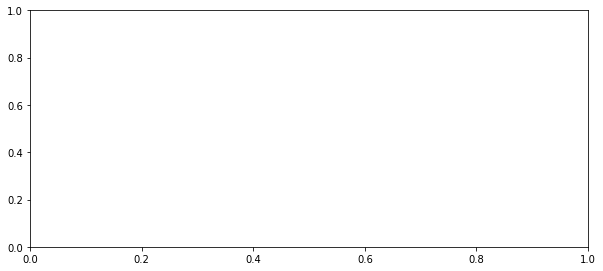

In [34]:
ax1 = plt.subplot(4,1,1)
ax1
"""
# equivalent but more general
ax1=plt.subplot(4,1 , 1)
"""

NameError: name 'c' is not defined

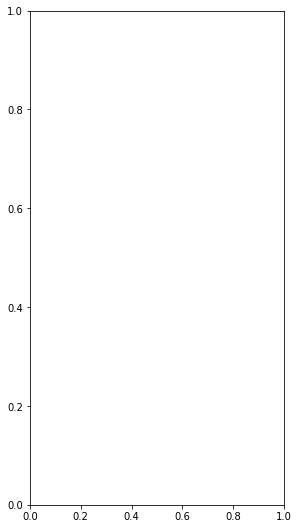

In [43]:
ax1=plt.subplot(221)
ax1

"""
# equivalent but more general
ax1=plt.subplot(2, 2, 1)
"""

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)
ax2

# add a polar subplot
ax3=plt.subplot(223, projection='polar')
ax3
# add a red subplot that shares the x-axis with ax1

ax4=plt.subplot(224, sharex=ax1, facecolor='red')
ax4
"""
#delete ax2 from the figure
plt.delaxes(ax2)

#add ax2 to the figure again
plt.subplot(ax2)
"""

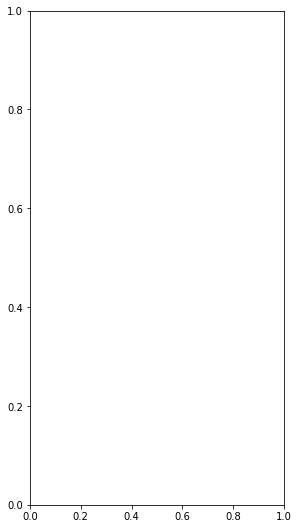

In [44]:
ax1=plt.subplot(221)
ax1

In [ ]:
# 1. 전체 표본에 대한 분포
ax1 = plt.subplot(411) #4개의 행을 그리고 한 개의 열을 가진 그림판을 그릴 것이야
sns.distplot(housing_data['median_house_value'])# 씨본의 distplot 명령은 러그(선)와 커널 밀도 표시 기능이 있어 맷플롯라이브러리보다 많이 사용 됨.
plt.title('Dataset')

###... for more detail [TIL/Machine Learning/커널밀도(Kernel Density Estimation_KDE).ipynb]


In [49]:
housing_data.median_house_value.sample(5).mean() # housing_data(file name)"."the name of column"."sample()"."mean()

170540.0

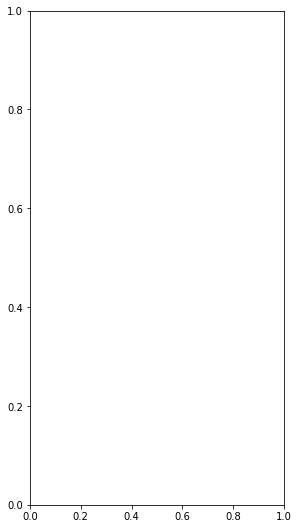

In [50]:
a=plt.subplot(221)
a

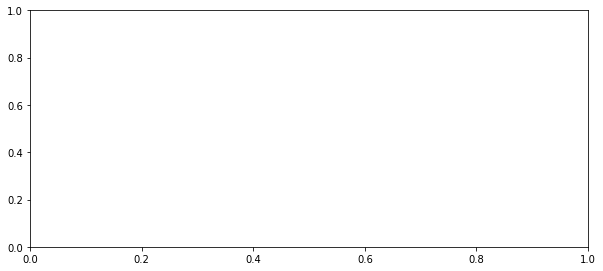

In [48]:
ax=plt.subplot(411)
ax

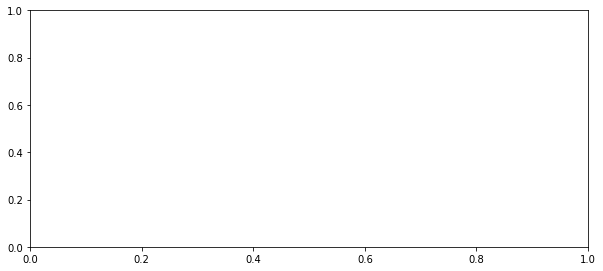

In [41]:
ax2 = plt.subplot(412)
ax2

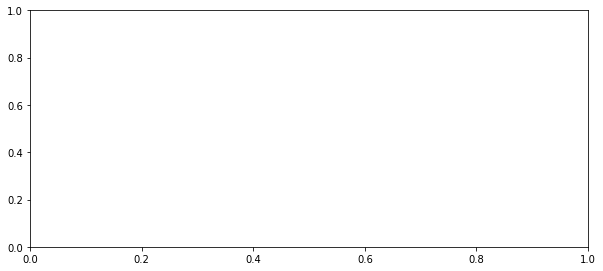

In [42]:
ax2 = plt.subplot(412, sharex = ax1) # defaulted value for sharex is false which means x- or y-axis will be independent. but this means ax2 will be depend on ax2?
ax2

matplotlib.pyplot.subplots(nrows=1, ncols=1, **sharex=False**, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, fig_kw)

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
Controls sharing of properties among x (sharex) or y (sharey) axes:

True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.
'row': each subplot row will share an x- or y-axis.
'col': each subplot column will share an x- or y-axis.
When subplots have a shared x-axis along a column, only the x tick labels of the bottom subplot are created. Similarly, when subplots have a shared y-axis along a row, only the y tick labels of the first column subplot are created. To later turn other subplots' ticklabels on, use tick_params.

[https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html]


Text(0.5, 1.0, 'Sample mean of 5 data points : 1000 samples')

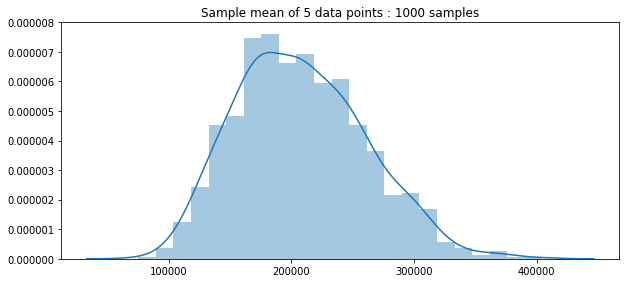

In [45]:
# 2. 데이터를 5개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 5이다. 이 과정을 1000번 반복한다. 
sample_5 = [] # making the list for containing 표본평균
for _ in range(1000): #하기 과정을 1000번 반복
    sample_5.append(housing_data.median_house_value.sample(5).mean())
ax2 = plt.subplot(412, sharex = ax1)
sns.distplot(sample_5)
plt.title('Sample mean of 5 data points : 1000 samples')

Text(0.5, 1.0, 'Sample mean of 100 data points : 1000 samples')

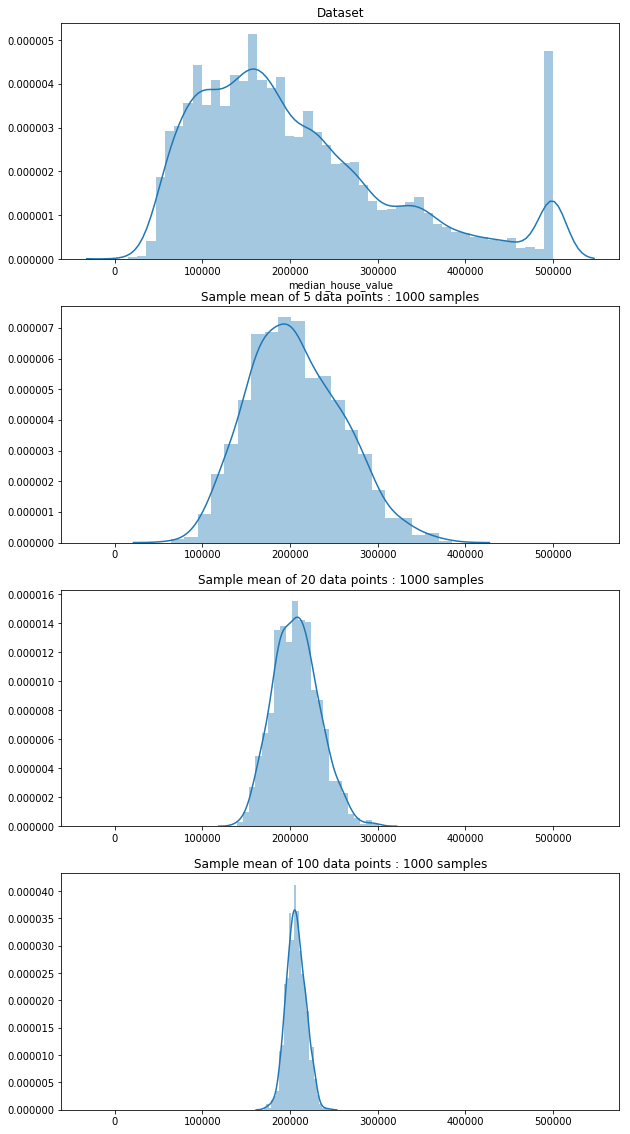

In [46]:
# 1. 전체 표본에 대한 분포
ax1 = plt.subplot(411) #4개의 행을 그리고 한 개의 열을 가진 그림판을 그릴 것이야
sns.distplot(housing_data['median_house_value'])# 씨본의 distplot 명령은 러그(선)와 커널 밀도 표시 기능이 있어 맷플롯라이브러리보다 많이 사용 됨.
plt.title('Dataset')


# 2. 데이터를 5개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 5이다. 이 과정을 1000번 반복한다. 
sample_5 = [] # making the list for containing 표본평균
for _ in range(1000):
    sample_5.append(housing_data.median_house_value.sample(5).mean())
ax2 = plt.subplot(412, sharex = ax1)
sns.distplot(sample_5)
plt.title('Sample mean of 5 data points : 1000 samples')

# 3. 데이터를 20개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 20이다. 이 과정을 1000번 반복한다.
sample_20 = []# making the list for containing 표본평균
for _ in range(1000):
    sample_20.append(housing_data.median_house_value.sample(20).mean()) 
ax3 = plt.subplot(413, sharex = ax1)
sns.distplot(sample_20)
plt.title('Sample mean of 20 data points : 1000 samples')

# 4. 데이터를 100개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 100이다. 이 과정을 1000번 반복한다.
sample_100 = []
for _ in range(1000):
    sample_100.append(housing_data.median_house_value.sample(100).mean())
ax4 = plt.subplot(414, sharex = ax1)
sns.distplot(sample_100)
plt.title('Sample mean of 100 data points : 1000 samples')

중심 극한 정리는 모집단이 정규 분포가 아니더라도, 표본 크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종 모양의 정규 곡선을 따른 다는 것을 보여준다. 중심 극한 정리 덕분에, 추론을 위한 표본 분포에, 즉 신뢰 구간이나 가설검정을 계산 하는 데에  t 정규 근사 공식을 사용할 수 있다.
데이터 과학에서는 형식적인 가설검정이나 신뢰구간이 통계에서의 중요성 만큼, 중요하지 않지 때문에 ( 형식적인 가설 검정이나 신뢰구간의 밑바탕이 바로 중심극한정리이다) 중심 극한 정리가 통계에서의 중요성만큼 중요하지 않다.


-> 이게 중심 극한 정리 임!!!!!

**Standard Error**

* 표본 크기가 커지면 표준 오차가 줄어들며, 표준 오차와 표본 크기 사이의 관계를  때로는 제곱근의 법칙이라고 한다. 표준 오차를 2배로 줄이려면, 표본 크기를 4배 증가 시켜야 한다.
* 표준 오차를 측정할 때, 고려해야 할 사항
 * 1.	모집단에서 완전히 새로운 샘플들을 많이 수집한다.
 * 2.	각각의 새 샘플에 대해 통계량(예, 평균)을 계산한다.
 * 3.	2번째 단계에서 얻은 통계량의 표준 편차를 계산한다. 이것을 표준 오차의 추정치         로 사용한다.

* 현대 통계에서는 새로운 샘플을 뽑을 필요 없이, **부트 스트랩 재표본**을 사용하여 표준 오차를 추정한다. 현대 통계에서 부트 스트랩은 표준 오차를 추정하는 표준 방법이 되었따. 사실 상 모든 통계에서 사용할 수 있으며, 중심극한 정리 또는 기타 분포 가정에 의존하지 않는다.


as the lecturer said..

**표준오차는 표본분포의 변동성을 나타내는 측정 지표

* 이건 현실적으로 어렵고 부트 스트랩을 사용!
* 부트 스트랩은 스탠다드 에러 ( 샘플 간의 불균형을 확인 하기 위해서) 사용!
* 부트 스트랩은 랜덤하게 추출하는 것이기 때문에 어떠한 가정에도 의지 하지 않는다!
* 표본이 100개 있으면 여기에서 복원(겹쳐져도 된다) 추출을 계속 하는 것 
* 복원 추출을 n개 하는 경우-> s1
* 복원 추축을 n +1 개 하는 경우 ->s2
* --> s1, s2…… 이걸 미디언, 평균 하는 것 


**(Bootstrap 알고리즘)**

1.	샘플 값을 하나 뽑아서 기록하고 제자리에 놓는다.
2.	번 반복한다.
3.	번 재표본추출된 값의 평균을 기록한다.
4.	1~3단계를 번 반복한다.
5.	개의 결과를 사용하여 (총 번 추출)
*결과들의 표준편차(표본 평균의 표준오차)를 계산한다.
*히스토그램 또는 상자 그림을 그린다.
*신뢰 구간을 찾는다.*

부트스트랩의 반복횟수는 임의로 설정한다. 반복횟수가 많을수록 표준 오차나 신뢰구간에 대한 추정이 더 정확해진다. 이런 절차를 통해 표본 통계량 혹은 추정한 모델 파라미터의 부트 스트랩 집합을 얻게 되고, 결과적으로 이 집합이 얼마나 변하는 지를 조사 할 수 있다.


as lecturer said...


* 표본 분포는 표본에서 추출한 표본 평균들 간의 분포다. 
* 부트 스트랩의 방법은 현재 있는 표본에서 추가적으로 표본을 **복원추출**하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것
* 표본이 100개 있으면 여기에서 복원(겹쳐져도 된다) 
추출을 계속 하는 것 복원 추출을 n개 하는 경우-> s1 
복원 추축을 n +1 개 하는 경우 ->s2 -- s1, s2…… 이걸 미디언, 평균 하는 것 
* 철학 : 표본을 많이 복제하고(수천, 수백만 번) 이를 통해 원래 표본으로부터 얻어지는 모든 정보를 포함하는 가상 모집단을 얻게 된다고 가정할 수 있음

*리 샘플링** -> Bootstrap과 Permutation test(순열 검정)이 있음..

Bootstrap sample(부트스트랩 표본) : 관측 데이터 집합으로부터 얻은 복원추출 표본 
Resampling(재표본추출, 리샘플링) : 관측 데이터로부터 반복해서 표본추출하는 과정이며, Bootstrap과 Permutation test(순열 검정)을 포함
***횟수는 스탠다드 에러(표본 들간의 변동성이 작아야함)가 가장 작은 횟수를 찾을 것임! 최종 목표는 베리에이션이 가장 작은 것을 찾는 것!

#  (예제) Bootstrap을 이용하여 미국 인구의 median을 추정하라

In [51]:
state_pop_dataset.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [52]:
state_pop_dataset.population.median()

1597005.0

In [53]:
state_pop_dataset.population.sample(100, replace=True).median()

1542020.0

In [54]:
state_pop_dataset.population.sample(100, replace=True).median() # replace true means 'random sampling with replacement'

1507916.0

In [55]:
# (미국 인구 데이터) 부트스트랩 분포  1. sampling -> finding out 'mean'
state_pop_sample_meds = []
# 100개의 data가 1개의 sample set이다. 총 500번 반복
for _ in range(500):
    samp_med = state_pop_dataset.population.sample(100, replace=True).median()
    state_pop_sample_meds.append(samp_med)
#replace=True is 복원 추출

In [56]:
print('bootstrap median :', np.mean(state_pop_sample_meds))
print('bootstrap median의 표준오차(변동성) :', np.std(state_pop_sample_meds))

## 부트 스트랩 미디언의 중간 값이 얼마만큼 변동성이 있는 지 확인 하는 것은 스탠다드 밸류 데이션(표준 오차)_which is variation
#미디언 값들의 전체 분포를 사용하는 것. 그리고 스탠다느 베리에이션을 이용해서 얼마나 퍼져있는 지를 확인 하는 것!
#부트 스트랩은 샘플링을 하는 것이 아니라 표본 값들의 변동성을 확인 하는 것 ( 표본 값들이 얼마나 퍼져있는지 확인해주는 것이 부트 스트랩임_ 부트 스트랩은 변동성을 확인 하는 도구임. 그러나 부트 스트랩으로 샘플링을 하는 것이 목적은 아님!)

bootstrap median : 1698996.588
bootstrap median의 표준오차(변동성) : 355643.9703774932


# 4. 신뢰구간(신뢰 구간 검정_부트 스트랩의 결과를 사용한다!)




분포를 구한 후에 신뢰 구간(샘플 스탯이 어느 구간에 있는 경우 그 샘플을 신뢰 할 만 하다!)을 구해야함!


(예제) 캘리포니아 지역의 평균 집 값에 대한 90% 신뢰구간을 부트스트랩을 이용하여 구하라.

In [58]:
# Housing data
house_prices=[]
for _ in range(500):
    mean_price =housing_data.median_house_value.sample(100, replace= True).mean()
    house_prices.append(mean_price)

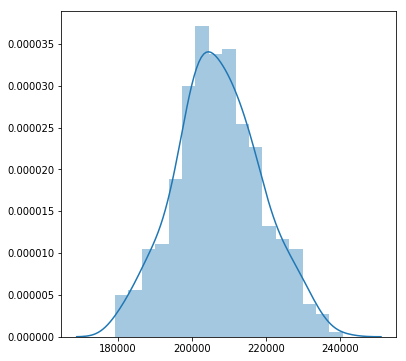

In [59]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.distplot(house_prices, kde=True) # kde means curve

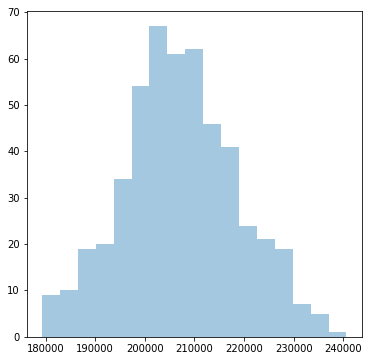

In [60]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.distplot(house_prices, kde=False)

In [62]:
# 90 %
ci_min = np.percentile(house_prices,5)
ci_max = np.percentile(house_prices,95)

print('90% CI lower:', ci_min)
print('90% CI upper:', ci_max)

90% CI lower: 187875.76950000002
90% CI upper: 227521.1485


(예제) 미국 지역별 살인 발생 횟수의 평균에 대한 90% 신뢰구간을 부트스트랩을 이용하여 구하라.

In [65]:
how_many_murders=[]
for _ in range(500):
    mean_murders =dataset.sample(100, replace= True).mean()
    how_many_murders.append(mean_murders)
how_many_murders

[1       22.53
 4     3460.08
 7        2.92
 10       2.58
 12      34.63
 15       1.35
 17       1.14
 20       1.31
 dtype: float64, 1       20.16
 4     3383.73
 7        2.90
 10       2.87
 12      36.61
 15       1.38
 17       1.20
 20       1.30
 dtype: float64, 1       21.33
 4     3545.17
 7        3.04
 10       2.99
 12      35.85
 15       1.45
 17       1.17
 20       1.29
 dtype: float64, 1       21.22
 4     3555.23
 7        2.68
 10       2.76
 12      33.70
 15       1.34
 17       1.07
 20       1.31
 dtype: float64, 1       21.13
 4     3061.04
 7        3.23
 10       2.91
 12      36.44
 15       1.36
 17       1.18
 20       1.31
 dtype: float64, 1       18.34
 4     3095.83
 7        2.93
 10       2.86
 12      34.69
 15       1.37
 17       1.15
 20       1.26
 dtype: float64, 1       20.56
 4     3248.62
 7        2.87
 10       2.82
 12      36.41
 15       1.46
 17       1.13
 20       1.22
 dtype: float64, 1       19.63
 4     2745.87
 7        2.94
 10

ValueError: color kwarg must have one color per data set. 8 data sets and 1 colors were provided

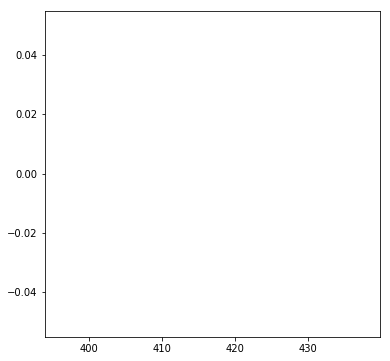

In [67]:
sns.distplot(how_many_murders, kde=True)

In [68]:
# 90 %
ci_min = np.percentile(how_many_murders,5)
ci_max = np.percentile(how_many_murders,95)

print('90% CI lower:', ci_min)
print('90% CI upper:', ci_max)

90% CI lower: 1.15
90% CI upper: 3339.5785


**5. 정규분포**
 
* 용어 정리
    * Error(오차): 데이터 포인트와 예측 값 혹은 평균 사이의 거리
    * Standardize(표준화/정규화 하다): 평균을 빼고 표준편차로 나눈다.
    * Z-score(점수): 개별 데이터 포인트를 정규화한 결과
    * QQ plot(QQ그림): 표분 분포가 정규 분포에 얼마나 가까운지를 보여주는 그림
    * Standard normal distribution
    
* 대부분의 데이터가 정규 분포를 따르기 때문에, 즉 이게 정상이기 떄문에  정상적인 분포라고 부르는 것은 아니다. 실제로 전형적인 데이터 과학 프로젝트에서 사용되는 대부분의 변수들, 실제 대부분의 원시 데이터는 전체적으로 정규 분포를 따르지 않는다. 표분 분포에서 대부분의 통계량이 정규분포를 따른다는 점에서 정규분포의 유용함이 드러날 뿐이다. 설령 그렇다 해도 일반적으로 정규 분포 가정은 경험적 확률 분포나 부트스트랩 분포를 구할 수 없는 경우 사용되는 최후의 수단이다.

표준 정규 분포는 x축의 단위가 평균의 표준편차로 표현되는 정규 분포를 말한다. 데이터를 표준 정규 분포와 비교하려면 데이터를 평균을 뺀 다음 표준 편차로 나누면 된다. 이를 정규화(normalization) 또는 표준화(standardization)라고 한다. 이렇게 변화된 값을 z점수라고 하며, 정규 분포를 z분포라고 한다.

데이터를 z점수로 변환 (즉, 데이터를 표준화 또는 정규화)한다고 해서, 데이터가 정규 분포가 되는 것은 아니다. 단지 비교를 목적으로 데이터를 표준 정규 분포와 같은 척도로 만드는 것이다.

QQ그림은 표본이 정규 분포에 얼마나 가까운지를 시각적으로 판별하는 데 사용된다. 그림은 점수를 오름 차순으로 정렬하고 각 값의 z점수를 y축에 표시한다. x축은 정규 분포에서의 해당 분위수를 나타낸다. 데이터가 표준화 되었기 때문에, 단위는 평균으로부터 떨어진 데이터의 표준 편차 수에 해당한다. 점들이 대략 대각선 위에 놓이면 표분 분포가 정규분포에 가까운 것으로 간주 할 수 있다.


In [69]:
from scipy import stats

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([2.0000e+00, 6.0000e+00, 8.0000e+00, ..., 3.2627e+04, 3.7937e+04,
         3.9320e+04])),
 (1818.962970929764, 2635.7630813953497, 0.8336343466669406))

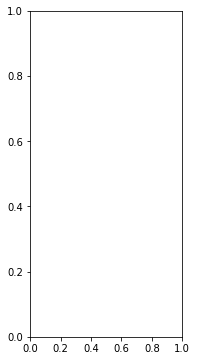

In [70]:
plt.subplot(121)
stats.probplot(housing_data.total_rooms) 
# SciPy패키지의 stats서브 패키지는 Q-Q 플롯을 probplot계산하고 그리기 위한 명령을 제공한다.
# probplot은 기본적으로 인수로 보낸 데이터 표본에 Q-Q대한 정보만을 반환하고 차트를 그리지 않는다. 만약 차트를 그리고 싶다면 plot인수에  matplotlib.pylab 모듈객체 혹은 Axes클래스 객체를 넘겨주어야 한다.


((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([2.0000e+00, 6.0000e+00, 8.0000e+00, ..., 3.2627e+04, 3.7937e+04,
         3.9320e+04])),
 (1818.962970929764, 2635.7630813953497, 0.8336343466669406))

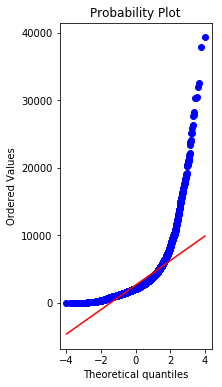

In [71]:
plt.subplot(121)
stats.probplot(housing_data.total_rooms,plot=sns.mpl.pyplot)

In [72]:
"""
# (Housing data)
from scipy import stats

plt.rcParams['figure.figsize']=(12,6)

# Housing Data
plt.subplot(121)
stats.probplot(housing_data.total_rooms,plot=sns.mpl.pyplot)
plt.title('Total roon number in California')

"""

"\n# (Housing data)\nfrom scipy import stats\n\nplt.rcParams['figure.figsize']=(12,6)\n\n# Housing Data\nplt.subplot(121)\nstats.probplot(housing_data.total_rooms,plot=sns.mpl.pyplot)\nplt.title('Total roon number in California')\n\n"

# 6. 긴 꼬리 분포

* tail(꼬리): 적은 수의 극단 값이 주로 존재하는, 도수 분포의 길고 좁은 부분
* skewness : 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도

* 오차나 표본통계량의 분포를 볼 때 정규 분포는 적절하고 유용하지만, 정규 분포가 일반적으로 원시 데이터 분포의 특징을 나타내지는 않는다.
* 실무에서는 롱 테일 분포를 잘 들여다 보는 것이 중요하다.
* 데이터는 가변적이며 보기에는 하나가 아닌 여러 유형의 분포와 일치 할 수 있다.
* 일반적으로 주어진 상황을 묘사하기에 적합한 분표 유형을 결정하기 위해서 데이터만 들여다 보는 것이 아니라, 분야 지식과 통계지식을 모두 활용해야 한다.
   *예) 5초 마다 연속적으로 서버의 인터넷 트래픽 수준에 대한 데이터를 얻는 다고 할 때   적합한 분포의 유형은?’시간 주기별 이벤트’를 모델링 하는 데 가장 적합한 분포가 포아송 분포라는 사전 지식이 있다면 큰 도움이 된다.*****




Text(0.5, 1.0, 'Total room number in California')

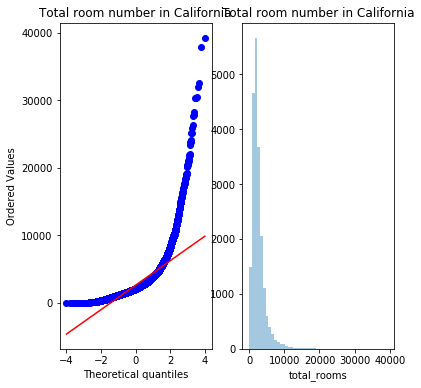

In [73]:
# (Housing dataset) 긴꼬리 분포와 그것의 QQ 그림을 비교
plt.subplot(121)
stats.probplot(housing_data.total_rooms, plot=sns.mpl.pyplot) # proplot - QQ
plt.title('Total room number in California')

plt.subplot(122)
sns.distplot(housing_data.total_rooms, kde=False) # rug, kernal density -distplot
plt.title('Total room number in California')

예제에서 왼쪽 그래프를 보면, 높은 값은 직선보다 휠씬 위에 위치하기 때문에, 이것은 데이터가 정규분포를 따른다고 할 때 예상 되는 것보다 휠씬 더 많은 극단값을 관찰할 가능성이 있다.

# Q -> Why is it important to look into long tail distribution in details ?
실무에서는 롱 테일 분포를 잘 들여다 보는 것이 중요하다.

# 7. 스튜던트의 t분포

as lecturer said...

표본 들의 분포 / 자유도가 중요함 / 정규 분포 보다  robust/ 

사실, 지금과 같은 성능의 컴퓨터가 1908년(t분포 논문이 나왔던 시기)부터 널리 보급됐다면, 처음부터 통계학은 계산을 많이 필요로 하는 resampling 방법을 더 많이 이용했을 것이다. 컴퓨터가 없었던 시절, 통계학자들은 표본분포를 근사화하기 위한 수학적 기법과 t분포와 같은 함수로 눈을 돌렸다.

표본통계량의 상태를 묘사할 때 t 분포의 정확도는 표본에 대한 통계량의 분포가 정규분포를 따른다는 조건을 필요로 한다. 모집단이 정규분포를 따르지 않을 때조차도, 표본통계량은 보통 정규분포를 따르는 것으로 나타났다. (t 분포가 널리 적용되는 이유이며 이런 현상을 중심극한정리라고 부른다.)


데이터 과학자에게는 불확실성과 변동성을 이해하고 정량화하는 것이 중요하다

(가설 검정 하려면 부트스트랩을 사용하는 게 good)

* n: 표본 크기
* Degrees of freedom(자유도): 다른 표본 크기, 통계량, 그룹의 수에 따라 분포를 조절하는 변수

* t분포는 정규 분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 길기 때문에, 표본 통계량의 분포를 설명하는 데 광범위하게 사용된다.
* 표본 평균의 분포는 일반적으로 t분포와 같은 형태이며 표본이 클수록 더욱 정규 분포를 닮은 t분포가 형성된다.
* 표준화된 여러 통계 자료를 t분포와 비교하여 신뢰구간을 추정할 수 있다.
* 표본 평균이 x인, 크기 n의 표본이 있다고 가정할 때, 가  표본 표준 편차 라면, 표본 평균 주위의 90% 신뢰구간은
*사실, 지금과 같은 성능의 컴퓨터가 1908년(t분포 논문이 나왔던 시기)부터 널리 보급 됐다면, 처음부터 통계학은 계산을 많이 필요로 하는 리 샘프링 방법을 더 많이 이용했을 것이다. 컴퓨터가 없었던 시절, 통계학자들은 표본 분포를 근사화 하기 위한 수학적 기법과 분포와 같은 함수로 눈을 돌렸다.
* 표본 평균, 두 표본 평균 간의 차이, 회귀 파라미터, 그 외 다른 통계량들의 분포를 구할 때 분포를 사용한다.
* 표본 통계량의 상태를 묘사할 때 분포의 정확도는 표본에 대한 통계량의 분포가 정규 분포를 따른다는 조건을 필요로 한다. 모집단이 정규분포를 따르지 않을 때 조차도, 표본 통계량은 보통 정규 분포를 따르는 것으로 나타났다 (t분포가 널리 적용되는 이유이며, 이런 현상을 ‘중심극한정리’라고 부른다.)


*데이터 과학자가 분포와 중심 극한 정리에 대해 알아야 할 것은 무엇일까? 사실, 별로 없다. 이러한 분포는 고전적인 통계적 추론에 사용되기는 하지만, 데이터 과학이 주로 추구하는 목적과는 조금 거리가 있다. 데이터 과학자에게는 불확실성과 변동성을 이해하고 정량화 하는 것이 중요하다. 이러한 목적을 위해서라면, 경험적 부트 스트랩 표본 추출을 통해서도 표본 오차에 대한 대부분의 질문에 답을 얻을 수 있다. 하지만 데이터 과학자들은 회귀 분석 같은 통계 절차를 통해 나온 통계량을 자주 만나게 되니 알아 두면 도움이 된다.


데이터를 모델링 하는 방법은  부트 스트랩을 반복해서 최대값, 최소값을 찾아냄 그러나 보통의  경우  what  사건에  what 분포를 사용하는 지 사전 지식이 필요함. 